In [1]:
import numpy as np
from scipy.stats import maxwell
from math import sqrt
from random import gauss
from matplotlib import pyplot as plt

T = 87          # K
M_a = 6.63e-26  # kg
m_e = 9.1e-31   # kg
k_b = 1.38e-23  # J/K

def J_to_eV(J):
    return 6.242e18 * J

def eV_to_J(eV):
    return 1.60218e-19 * eV

# m/s to J
def v_to_E(v):
    return 0.5 * m_e * np.dot(v, v)

# J to m/s
def E_to_v(E):
    return sqrt(2 * E / m_e)

def random_unit_vector():
    vec = [gauss(0, 1) for i in range(3)]
    mag = sum(x**2 for x in vec)**.5
    return np.array([x / mag for x in vec])

def random_velocity(eV):
    mag = E_to_v(eV_to_J(eV))
    return random_unit_vector() * mag

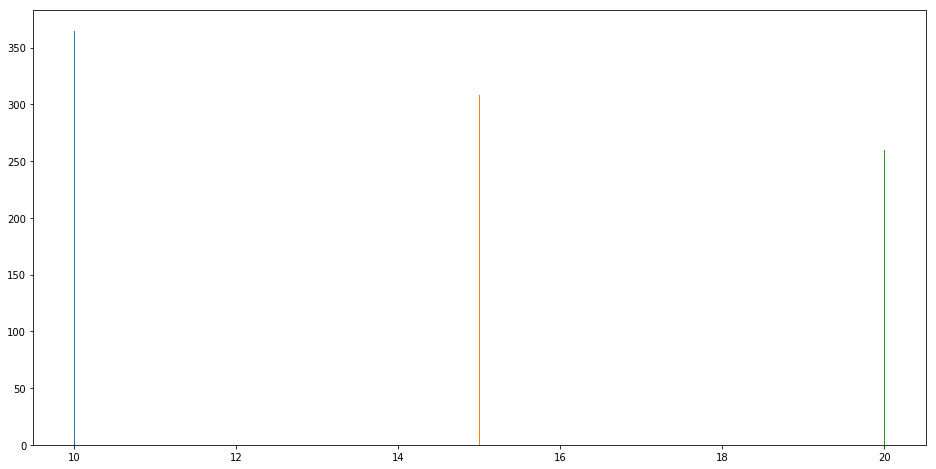

In [2]:
fig = plt.figure(figsize=(16,8))

en_list = [10, 15, 20]

for e in en_list:
    energies = []
    for i in range(1000):
        v = random_velocity(e)

        vm = random_unit_vector() * maxwell.rvs(size=1, scale=134.568)
        u = np.dot(v - vm, v - vm)**0.5
        n = random_unit_vector()

        a = (M_a * u) * n
        b = (m_e) * v
        c = (M_a) * vm

        v1 = (a + b + c) / (m_e + M_a)

        v = v1
        
        energy = J_to_eV(v_to_E(v))

        if (energy < 0):
            print(energy)
        
        energies.append(energy)

    plt.hist(energies, label=str(e))

plt.show()

The plot above shows energies resulting from a single momentum-transferral collision. The groupings are narrow and centered around the electron's initial energy, implying individual collisions do not significantly change our energy.

Our electron's velocity is almost always much higher than the velocity of our argon atoms. This implies $v \gg v_m$, and hence $\vec{u}\approx\vec{v}$. This also shows that we can neglect the $\frac{M}{M+m}\vec{v}_m$ term in our collision formula.

If we define $\vec{w}=\frac{Mv\hat{n}+m\vec{v}}{M+m}$, we see $\vec{v}_1\approx\vec{w}$, and so the final energy of our electron will be approximately $\frac{1}{2}mw^2$. The maximum of this quantity occurs when $\vec{n}$ coincides with $\vec{v}$, in which case we get $\frac{1}{2}mv^2$, i.e. unity gain. The minimum of this occurs when $\vec{n}$ points in the opposite direction. In this case, we get $\frac{1}{2}mv^2\frac{(M-m)^2}{(M+m)^2} = 0.9999\cdot\frac{1}{2}mv^2$.